# Machine Learning for Loan Approval: A Balancing Act Between Accuracy and Fairness

## Background

A start-up company wants to automate loan approvals by building a classifier to predict whether a loan will be paid back. In this situation, it is more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

## Objective

As a machine learning scientist, we need to build the classifier and prepare a report accessible to a broad audience. 

## Executive Summary

To determine whether a loan will be paid back, we analyze the important features of a borrower, such as the credit score, the number of public derogatory records, and others. In this scenario, we provide a machine learning model for the classification. The report is divided into the following sections:
1. Introduction: Overview of loan repayment and factors affecting the failure of non-repayment.
2. Data Preprocessing: Detailed explanation on data cleaning.
3. Feature Engineering: Extract or select features to train in the classifier.
4. Classifier: Model to classify loan repayments.

## Introduction

The repayment rate of loans is influenced by a variety of factors, including the borrower's creditworthiness, the type of loan, and the economic climate. Studies found that borrowers with higher credit scores are more likely to repay their loans on time and in full. Furthermorele, student loans are typically repaid at a lower rate than other types of loans, such as personal loans or auto loansLastinally, the economic climate can also affect the loan repayment rate. During economic downturns, borrowers may be more likely to default on their loans due to job loss or other financial difficult of defaults.

## Data Preprocessing

The dataset contains information mainly about the borrower, such as the credit score and the status of payment. For a complete list of features, observe the following table.

|    | Variable          | Description                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

In [23]:
import pandas as pd

loan = pd.read_csv("loan_data.csv")

The data has no null values and the features are set to the appropriate data type. Moreover, the purpose column needs no improvement as it contains unique and justified values. For the classifier, the target variable is the `not.fully.paid` feature. Note that there is class imbalance as there are fewer examples of loans not fully paid. Specifically, eight thousand forty-five (8045) are fully paid while one thousand five hundred thirty-three (1533) are not. This is important to note since machine learning classifiers tend to underperform when class imbalance exists.

In [24]:
# Look at null values and data types
print(loan.info())

# Look at the unique values of purpose
print(loan.purpose.unique())

# Class imbalance?
print(loan['not.fully.paid'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
['debt_consolidation' 'credit_card' 'all_other' 'home_impr

## Feature Engineering
Ttheheatmap of the correlation matrix between the numeric features are shown below. It is shown that FICO credit score and the interest rate are highly correlated. This is justified since  FICO credit scoreare used by lenders to determine thes interest rate on loan. We opt to retain the weak to moderately correlated features..

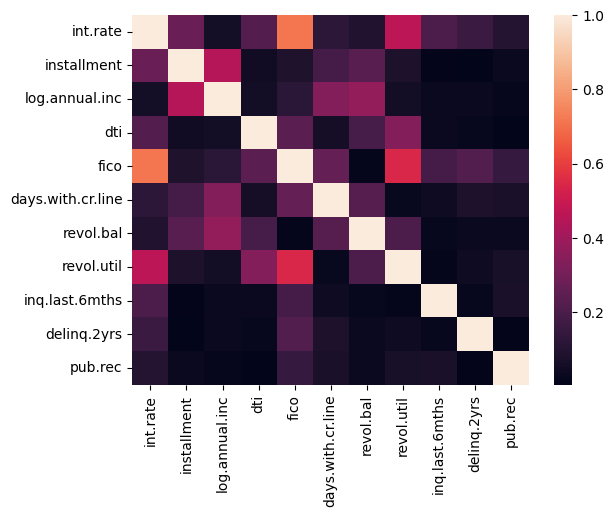

In [25]:
# Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation of numeric features
loan_num = loan.drop(['credit.policy', 'purpose', 'not.fully.paid'], axis = 1)
loan_corr = loan_num.corr().abs()

# Heatmap of correlation matrix
sns.heatmap(loan_corr)
plt.savefig('loan_corr.png')
plt.show()

# Drop one of the highly correlated features
loan.drop(['int.rate'], axis = 1, inplace = True)

It is also possible that the features are too many. The classifier must also be fitted on a training data with a lower dimension. Dimensionality reduction is implemented using the Principal Component Analysis (PCA). By reducing the dimension to two (2), the features explains 99.9% of the variance.

In [26]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA model and transform data
pca = PCA(n_components = 2)
loan_num_pca = pca.fit_transform(loan_num)

# Print feature importance
print(pca.explained_variance_ratio_)

[0.99480882 0.00515456]


For the categorical variable `purpose`, a one-hot encoding is applied to create a binary matrix.

In [27]:
# One-hot encoding for categorical variables
loan_dummies = pd.get_dummies(loan, drop_first = True)

# Observe first few rows
print(loan_dummies.head())

   credit.policy  installment  log.annual.inc    dti  fico  days.with.cr.line  \
0              1       829.10       11.350407  19.48   737        5639.958333   
1              1       228.22       11.082143  14.29   707        2760.000000   
2              1       366.86       10.373491  11.63   682        4710.000000   
3              1       162.34       11.350407   8.10   712        2699.958333   
4              1       102.92       11.299732  14.97   667        4066.000000   

   revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  \
0      28854        52.1               0            0        0   
1      33623        76.7               0            0        0   
2       3511        25.6               1            0        0   
3      33667        73.2               1            0        0   
4       4740        39.5               0            1        0   

   not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0               0                    0        

## Classifier

We use an extreme grandient-boosted (XGBoost) tree classifier for this situation. 
A gradient boosted tree classifierutiilizess an ensemble of decision trees to make predictions In addition, XGBoost ) is a specific implementation of a gradient boosted tree classifi that is a popul due to its speed, scalibility, and accuracy. Note that the manager wants to accurately predict if a loan will not be paid back. Since `1` is the value for a loan not getting paid back, the true negative rate is the metric that the manager wants to see. In this case, the true negative rate is 96% which means that the model has a high accuracy on determining loans that will not be paid back.e.

In [28]:
# Import necessary packages
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix

# Set features and target variables
y = loan_dummies['not.fully.paid']
X = loan_dummies.drop('not.fully.paid', axis = 1)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

# Model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

# Print accuracy and recall scores
y_pred = xgb_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn/(tn+fp))

0.9662027833001988


When the model is trained on a data whose dimension is reduced using PCA, the true negative rate slightly increases to 98%.

In [29]:
# Reduce dimension of the training and the testing set
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Fit model on the dimension-reduced data
xgb_model.fit(X_pca_train, y_train)
y_pred_pca = xgb_model.predict(X_pca_test)
tn_pca, fp_pca, fn_pca, tp_pca = confusion_matrix(y_test, y_pred_pca).ravel()

# Print true negative rate
print(tn_pca/(tn_pca+fp_pca))

0.9835984095427436


Now, due to the class imbalance, a Synthetic Minority Over-sampling Technique (SMOTE) may be implemented to balance the two classes. The model obtained a 89% true negative rate, which is way lower than the previous two models. This may be due to the misrepresentation of the synthetic samples produced by SMOTE on the class.

In [30]:
# Import necessary package/s
!pip install imblearn
from imblearn.over_sampling import SMOTE

# Create SMOTE model
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Split to training and testing datasets
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, stratify = y_smote, random_state = 42)

# Fit model
xgb_model.fit(X_smote_train, y_smote_train)

# Predict testing set and print true negative rate
y_pred_smote = xgb_model.predict(X_smote_test)
tn_smote, fp_smote, fn_smote, tp_smote = confusion_matrix(y_smote_test, y_pred_smote).ravel()

# Print true negative rate
print(tn_smote/(tn_smote+fp_smote))

0.897117296222664


Using an automated machine library like TPOT, an optimized pipieline is found based on the cross-validation scores. Looking at the true negative rates when the pipeline is fitted on the original and dimension-reduced training datasets, the true negative rates are 96% and 92% respectively. 

In [54]:
# Import necessary packages and functions
from tpot import TPOTClassifier

# Find optimized pipeline for the situation
tpot = TPOTClassifier(generations=50, population_size=25, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
tpot.export('tpot_loan.py')

                                                                                                                       
Generation 1 - Current best internal CV score: 0.8312746717500585
                                                                                                                       
Generation 2 - Current best internal CV score: 0.8312746717500585
                                                                                                                       
Generation 3 - Current best internal CV score: 0.83376061934612
                                                                                                                       
Generation 4 - Current best internal CV score: 0.83376061934612
                                                                                                                       
Generation 5 - Current best internal CV score: 0.8431255581562311
                                                                          

In [36]:
# Import packages from saved pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from tpot.export_utils import set_param_recursive

# Create pipeline, fit the data into the model, and predict
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.9500000000000001)
)
exported_pipeline.fit(X_train, y_train)
y_pred_tpot = exported_pipeline.predict(X_test)

# Create pipeline, fit the reduced data into the model, and predict
exported_pipeline.fit(X_pca_train, y_train)
y_pred_pca_tpot = exported_pipeline.predict(X_pca_test)

# Obtain the true negative rates
tn_tpot, fp_tpot, fn_tpot, tp_tpot = confusion_matrix(y_test, y_pred_tpot).ravel()
tn_pca_tpot, fp_pca_tpot, fn_pca_tpot, tp_pca_tpot = confusion_matrix(y_test, y_pred_pca_tpot).ravel()
print((tn_tpot/(tn_tpot+fp_tpot),tn_pca_tpot/(tn_pca_tpot+fp_pca_tpot)))

(0.9662027833001988, 0.9224652087475149)
